In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ToyotaCorolla560.csv")
df.head()

,Price,Age,KM,FuelType,Horsepower,MetColor,Automatic
0,20500,12,5000,Petrol,110,1,0
1,20950,14,5278,Petrol,110,1,1
2,11250,47,5309,Petrol,110,1,1
3,19950,14,5459,Petrol,110,1,0
4,19950,14,6000,Petrol,110,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       1381 non-null   int64 
 1   Age         1381 non-null   int64 
 2   KM          1381 non-null   int64 
 3   FuelType    1381 non-null   object
 4   Horsepower  1381 non-null   int64 
 5   MetColor    1381 non-null   int64 
 6   Automatic   1381 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 75.6+ KB


In [4]:
df.describe()

,Price,Age,KM,Horsepower,MetColor,Automatic
count,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000
mean,10561.284576,56.827661,68304.926865,101.488052,0.671977,0.057205
std,3262.851144,17.515314,34366.471288,14.984365,0.469663,0.232318
min,4350.000000,10.000000,5000.000000,69.000000,0.000000,0.000000
25%,8450.000000,45.000000,43905.000000,86.000000,0.000000,0.000000
50%,9900.000000,61.000000,63634.000000,110.000000,1.000000,0.000000
75%,11750.000000,70.000000,86714.000000,110.000000,1.000000,0.000000
max,24500.000000,80.000000,198167.000000,192.000000,1.000000,1.000000


In [5]:
df.shape

(1381, 7)

In [10]:
df.FuelType.nunique()

2

In [6]:
df.FuelType.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [12]:
df.FuelType.value_counts()

Petrol    1244
Diesel     137
Name: FuelType, dtype: int64

In [7]:
mapping = {'Petrol': 1,'Diesel':0 }

In [8]:
df['FuelTypeNumeric'] = df.FuelType.map(mapping)

In [9]:
df["MetColorText"] = df.MetColor.replace({1: 'Yes', 0: 'No'})
df["AutomaticText"] = df.Automatic.apply(lambda x: 'Yes' if x == 1 else 'No')
df.head()

,Price,Age,KM,FuelType,Horsepower,MetColor,Automatic,FuelTypeNumeric,MetColorText,AutomaticText
0,20500,12,5000,Petrol,110,1,0,1,Yes,No
1,20950,14,5278,Petrol,110,1,1,1,Yes,Yes
2,11250,47,5309,Petrol,110,1,1,1,Yes,Yes
3,19950,14,5459,Petrol,110,1,0,1,Yes,No
4,19950,14,6000,Petrol,110,0,0,1,No,No


In [14]:
# Calculate the correlation matrix
df['FuelType'] = df['FuelType'].map({'Petrol': 1, 'Diesel': 0})
corr = df.corr()


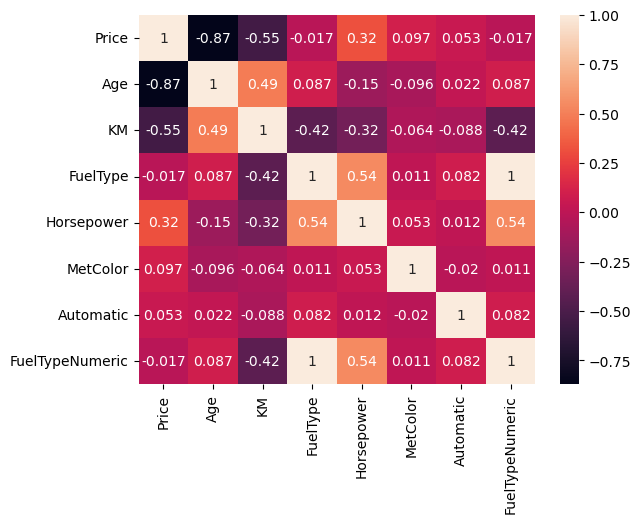

In [15]:
# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

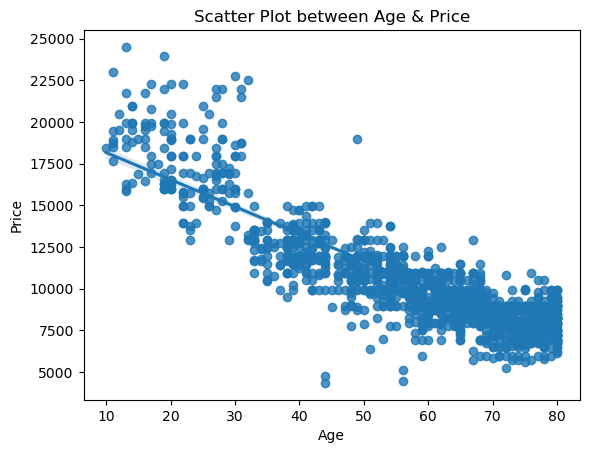

In [16]:
# Creating the scatter plot with a regression line
sns.regplot(x='Age', y='Price', data=df)

# Optionally, set the title
plt.title('Scatter Plot between Age & Price')

# Show the plot
plt.show()


# Simple Ordinary Least Squares (OLS) Regression

In [18]:
#Ordinary Least Squares (OLS) 
import statsmodels.api as sm

X = sm.add_constant(df['Age'])  # Adds a constant term to the predictor
Y = df['Price']

In [19]:
model = sm.OLS(Y, X)

In [21]:
results = model.fit()

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     4358.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:19:23   Log-Likelihood:                -12148.
No. Observations:                1381   AIC:                         2.430e+04
Df Residuals:                    1379   BIC:                         2.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.979e+04    146.251    135.300      0.000    1.95e+04    2.01e+04
Age         -162.3593      2.460    -66.013      0.000    -167.184    -157.535
==============================================================================
Omnibus:                      176.454   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.694
Skew:                           0.519   Prob(JB):                    8.21e-175
Kurtosis:                       6.586   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""